# Data Processing and Manipulation with Pandas and NumPy

Welcome to this workshop! In this session, we'll cover:

- Data processing and manipulation using **Pandas**
- Performing equivalent operations using **NumPy**
- Utilizing Pandas' native plotting features for quick data exploration

## Table of Contents

1. [Introduction](#introduction)
2. [Data Loading and Exploration](#data_loading)
3. [Data Manipulation with Pandas](#data_manipulation_pandas)
4. [Equivalent Operations with NumPy](#equivalent_numpy)
5. [Pandas Native Plotting](#pandas_plotting)
6. [Conclusion](#conclusion)

---

<a id='data_loading'></a>
## 1. Data Loading and Exploration

We'll start by loading a sample dataset and exploring its contents.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Loading the Dataset

- We'll use the **Titanic** dataset for demonstration.
- This dataset contains information about the passengers on the Titanic.

In [3]:
# Load the Titanic dataset from a URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Overview

- **Columns**:
  - `PassengerId`, `Survived`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, `Embarked`.
- Use `df.info()` and `df.describe()` to get more details.

In [4]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Get statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='data_manipulation_pandas'></a>
## 2. Data Manipulation with Pandas

We'll perform common data manipulation tasks using Pandas.

### Selecting Columns

- Select a single column: `df['Age']`
- Select multiple columns: `df[['Age', 'Fare']]`

In [6]:
# Select 'Age' and 'Fare' columns
df_subset = df[['Age', 'Fare']]
df_subset.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### Filtering Rows

- Filter rows where `Age` > 30: `df[df['Age'] > 30]`
- Filter rows where `Sex` is `female`: `df[df['Sex'] == 'female']`

In [9]:
# Filter passengers older than 30
df_over_30 = df[df['Age'] > 30]
df_over_30.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### GroupBy Operations

- Calculate mean age by sex: `df.groupby('Sex')['Age'].mean()`
- Count survivors by passenger class: `df.groupby('Pclass')['Survived'].sum()`

In [10]:
# Mean age by sex
mean_age_by_sex = df.groupby('Sex')['Age'].mean()
mean_age_by_sex

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [6]:
df.groupby('Pclass')['Survived'].sum()


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

### Adding New Columns

- Create a new column `FamilySize` as the sum of `SibSp` and `Parch`.

In [11]:
# Add a new column 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']
df[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


### Handling Missing Values

- Check for missing values: `df.isnull().sum()`
- Fill missing `Age` values with the mean age: `df['Age'].fillna(df['Age'].mean(), inplace=True)`
- Drop rows with missing `Embarked`: `df.dropna(subset=['Embarked'], inplace=True)`

In [12]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [13]:
# Fill missing 'Age' values with mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop rows with missing 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

# Verify missing values again
df.isnull().sum()

/var/folders/7w/yxhnfrms0c39ycj304vpk2q40000gp/T/ipykernel_14351/1446127977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64

<a id='equivalent_numpy'></a>
## 3. Equivalent Operations with NumPy

We'll demonstrate how to perform similar data manipulation tasks using NumPy arrays.

### Converting DataFrame to NumPy Array

- Use `.values` attribute: `df.values`
- Select specific columns: `df[['Age', 'Fare']].values`

In [14]:
# Convert 'Age' and 'Fare' columns to NumPy array
data_array = df[['Age', 'Fare']].values
print(data_array[:5])

[[22.      7.25  ]
 [38.     71.2833]
 [26.      7.925 ]
 [35.     53.1   ]
 [35.      8.05  ]]


### Filtering Data

- Filter rows where `Age` > 30: `data_array[data_array[:, 0] > 30]`

In [15]:
# Filter rows where 'Age' > 30
filtered_array = data_array[data_array[:, 0] > 30]
print(filtered_array[:5])

[[38.     71.2833]
 [35.     53.1   ]
 [35.      8.05  ]
 [54.     51.8625]
 [58.     26.55  ]]


### Calculations

- Calculate mean age: `np.mean(data_array[:, 0])`
- Sum of fares: `np.sum(data_array[:, 1])`

In [16]:
# Calculate mean age and sum of fares
mean_age = np.mean(data_array[:, 0])
total_fare = np.sum(data_array[:, 1])
print(f"Mean Age: {mean_age}")
print(f"Total Fare: {total_fare}")

Mean Age: 29.65344637067425
Total Fare: 28533.949299999997


### Handling Missing Values in NumPy

- Use `np.isnan()` to identify `NaN` values.
- Replace `NaN` with mean value: `data_array[np.isnan(data_array)] = mean_value`

In [17]:
# Identify NaN values
nan_indices = np.isnan(data_array)
print(f"Number of NaNs: {np.sum(nan_indices)}")

# Replace NaNs with mean age for 'Age' column
mean_age = np.nanmean(data_array[:, 0])
data_array[np.isnan(data_array[:, 0]), 0] = mean_age

# Verify NaN replacement
print(f"Number of NaNs after replacement: {np.sum(np.isnan(data_array))}")

Number of NaNs: 0
Number of NaNs after replacement: 0


<a id='pandas_plotting'></a>
## 4. Pandas Native Plotting

Pandas provides built-in plotting functions for quick data visualization.

### Histogram

- Plot a histogram of the `Age` column: `df['Age'].plot.hist()`

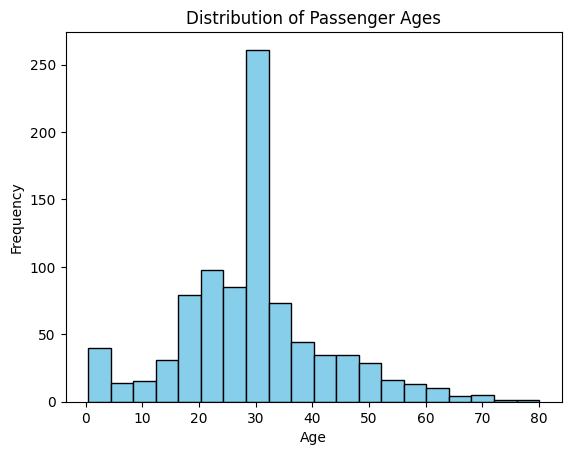

In [18]:
# Plot histogram of 'Age'
df['Age'].plot.hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Bar Plot

- Plot the number of passengers by `Pclass`: `df['Pclass'].value_counts().plot.bar()`

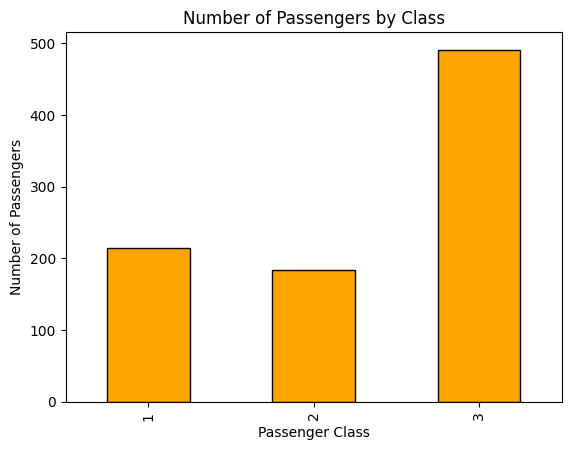

In [19]:
# Bar plot of passenger class counts
df['Pclass'].value_counts().sort_index().plot.bar(color='orange', edgecolor='black')
plt.title('Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

### Scatter Plot

- Create a scatter plot of `Age` vs. `Fare`: `df.plot.scatter(x='Age', y='Fare')`

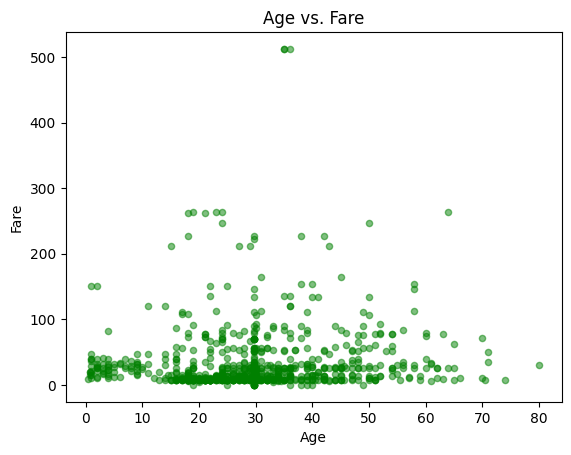

In [20]:
# Scatter plot of 'Age' vs. 'Fare'
df.plot.scatter(x='Age', y='Fare', alpha=0.5, color='green')
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Box Plot

- Create a box plot of `Age` grouped by `Pclass`: `df.boxplot(column='Age', by='Pclass')`

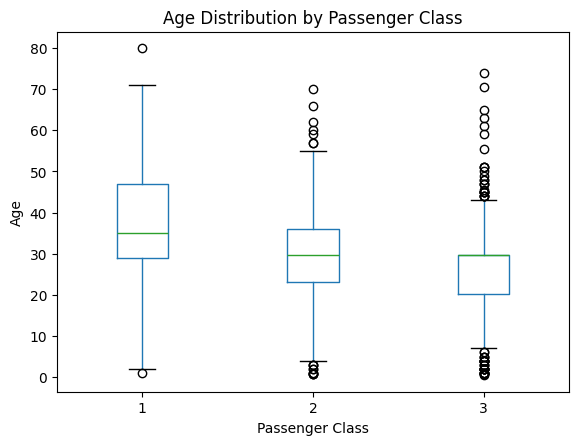

In [11]:
# Box plot of 'Age' by 'Pclass'
df.boxplot(column='Age', by='Pclass', grid=False)
plt.title('Age Distribution by Passenger Class')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by ...' title
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

<a id='conclusion'></a>
## 5. Conclusion

In this workshop, we've:

- Explored data loading and initial exploration with Pandas.
- Performed data manipulation tasks using Pandas DataFrames.
- Demonstrated how to perform equivalent operations using NumPy arrays.
- Utilized Pandas' native plotting functions for quick data visualization.

**Next Steps:**

- Practice with your own datasets to reinforce these concepts.
- Explore more advanced data manipulation techniques in Pandas and NumPy.
- Learn about data visualization libraries like Seaborn and Plotly for enhanced plots.

---

Feel free to ask any questions or share your experiences with data processing in Pandas and NumPy!